# PSU DS 200 
# Fall 2020
# Miniproject Deliverable #2 
# Interpret Decision Tree for Sentiment Classification Using Important Features

## December 3, 2020

## Instructor: Professor John Yen
## TA: Rupesh Prajapati
## LA: Nathan Tack

#### This Jupyter Notebook is intended to be used to construct Project Deliverables #2 for the Mini-project of DS 200. 

## The goal of this Miniproject Deliverable is to extract important features from a model so that you can combine them with the visualization of decision trees to do the following:
- To identify, among the very large number (hundreds) of features, what features are actually important for the model.
- By combining important features with the decision tree visualizations to interpret the role they play in the model (e.g., Does the appearance (or lack of appearance) of a word in a tweet more likely indicate a positive tweet for ...?)
- By comparing important features generated in different folds in a k-fold cross validation, we can not only identify multiple sets of important features, but also start to generate additional questions regarding these features and the class (e.g., positive/negative sentiment) you want to predict from a tweet.

#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.

#### Why extracting important features from a model is important?
- This helps people using the model to better understand the patterns/knowledge the model learns from the data.
- Being able to understand the knowledge captured in a model is the first step toward helping people to develop a suitable level of "trust" on the model.
- Comparing important features across different folds of a cross validation can also indicate whether the importance of the feature is "reliable".

#### How does sklearn help to identify important features
- The decision tree learning of sklearn module provides feature_importances, which is an array of "feature names" and associated "importance measure".  The importance measure of all features add up to 1.

# 9 Exercises (Total 105 points)
- Exercise 1: 10 points
- Exercise 2: 5 points
- Exercise 3: 5 points
- Exercise 4: 5 points
- Exercise 5: 10 points
- Exercise 6: 10 points
- Exercise 7: 20 points
- Exercise 8: 20 points
- Exercise 9: 20 points

# Due: 11:59 pm, December 11th





In [ ]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from graphviz import *

import pandas as pd
import numpy as np

from sklearn.externals import joblib

#import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-le

# Exercise 1 (10 points)
- Create a Project folder under DS200Labs in your Google Drive.
- Crearte a Tree folder under the Project folder you just created.
- Execute the three code cells below to show the content of both directories.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/Project/

Tree


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/Project/Tree/

In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/

baby.csv				  IMDBReviewsSentiment.csv
BC_10_2					  IRIS.csv
BC_10_2.pdf				  player_data.csv
Ben-NE-9-10-2015-pass-6.csv		  Project
Ben_Pass_5_2				  salary_data.csv
Ben_Pass_5_2.pdf			  SFSalaries2011_2014.csv
breast-cancer-wisconsin-data-windCSV.csv  station.csv
BreatCancerFinal.csv			  trip.csv
faithful.csv				  Tweets
IMDB5000movies.csv


# Exercise 2 (5 points)

Complete the following code to read the IMDBReviewsSentiment.csv file from your DS200Labs (similar to what you did in MiniProject Deliverable 1)

In [ ]:
path= "/content/drive/My Drive/DS200Labs/IMDBReviewsSentiment.csv"
reviews = Table.read_table(path)
reviews.show(10)

review,sentiment
One of the other reviewers has mentioned that after watc ...,positive
A wonderful little production. The filming t ...,positive
I thought this was a wonderful way to spend time on a to ...,positive
Basically there's a family where a little boy (Jake) thi ...,negative
"Petter Mattei's ""Love in the Time of Money"" is a visuall ...",positive
"Probably my all-time favorite movie, a story of selfless ...",positive
I sure would like to see a resurrection of a up dated Se ...,positive
"This show was an amazing, fresh & innovative idea in the ...",negative
Encouraged by the positive comments about this film on h ...,negative
If you like original gut wrenching laughter you will lik ...,positive


# Exercise 3 (5 points)
Sample 1000 positive reviews by completing the following cell (similar to Miniproject Deliverable #1).

In [ ]:
pos_reviews = reviews.where("sentiment", are.equal_to('positive')).sample(1000, with_replacement = False)
pos_reviews.show(10)

review,sentiment
Gorgeous Techicolor production telling the unusual tale ...,positive
I noticed this movie was getting trashed well before it ...,positive
Don't be swayed by the naysayers. This is a wonderfully ...,positive
Screened at the San Francisco International Film Festiva ...,positive
This movie is one of the masterpieces from Mr. Antonioni ...,positive
I Loved this movie. Mark Blankfield was perfect for this ...,positive
"Hitchcock made at least 11 films about the ordinary man, ...",positive
its been years since i have seen these shows. i have bee ...,positive
This is such a great film! Never mind the low rating her ...,positive
"These days Spielberg's ""The Color Purple"" is mostly reme ...",positive


In [ ]:
pos_reviews2 = pos_reviews.with_column("classification", 1)
pos_reviews2.show(5)

review,sentiment,classification
Gorgeous Techicolor production telling the unusual tale ...,positive,1
I noticed this movie was getting trashed well before it ...,positive,1
Don't be swayed by the naysayers. This is a wonderfully ...,positive,1
Screened at the San Francisco International Film Festiva ...,positive,1
This movie is one of the masterpieces from Mr. Antonioni ...,positive,1


# Exercise 4 (5 points)
Sample 1000 negative reviews, similar to what you did in Miniproject Deliverable #1.

In [ ]:
neg_reviews = reviews.where("sentiment", are.equal_to('negative')).sample(1000, with_replacement=False)
neg_reviews.show(10)

review,sentiment
How awful is it? Let me count the ways: 1) It is a bait- ...,negative
"Return to Frogtown was a hard film to track down. Well, ...",negative
This is a typical college comedy and its very average. T ...,negative
I thought I had seen this film before as the plot summar ...,negative
"Elfriede Jelinek, not quite a household name yet, is a w ...",negative
This video contains an outsmart way to confuse and manip ...,negative
"Quirky, independent, theatrical, Christian Slater--these ...",negative
Found an old VHS version of this film in my parents hous ...,negative
"This film has some nice special effects, tearing apart t ...",negative
I think that this was one of the most trite films ever m ...,negative


In [ ]:
neg_reviews2 = neg_reviews.with_column("classification", 0)
neg_reviews2.show(5)

review,sentiment,classification
How awful is it? Let me count the ways: 1) It is a bait- ...,negative,0
"Return to Frogtown was a hard film to track down. Well, ...",negative,0
This is a typical college comedy and its very average. T ...,negative,0
I thought I had seen this film before as the plot summar ...,negative,0
"Elfriede Jelinek, not quite a household name yet, is a w ...",negative,0


In [ ]:
reviews2 = pos_reviews2.append(neg_reviews2)
reviews2.show(5)
data = reviews2

review,sentiment,classification
Gorgeous Techicolor production telling the unusual tale ...,positive,1
I noticed this movie was getting trashed well before it ...,positive,1
Don't be swayed by the naysayers. This is a wonderfully ...,positive,1
Screened at the San Francisco International Film Festiva ...,positive,1
This movie is one of the masterpieces from Mr. Antonioni ...,positive,1


# Exercise 5 (10 points)
Complete the code below to (1) extract the text of reviews into variable data_X, (2) extract the classification of review into variable data_Y, and (3) calculate the number of positive reviews and negative reviews.

In [ ]:
# Use the data for constructing a Decision Tree Classifier for Review Sentiment
data_X= list(data['review'])
data_Y= list(data['classification'])
pos_count = data.where('classification', are.equal_to(1)).num_rows
neg_count = data.where('classification', are.equal_to(0)).num_rows

print('Data size:', len(data_X))
print('Positive Data Size: ', pos_count)
print('Negative Data Size: ', neg_count)

Data size: 2000
Positive Data Size:  1000
Negative Data Size:  1000


### Important Features for the Model with Best Max_depth

In Mini-project Deliverable #1, you have chosen a best value for max_depth of the decision tree model based on Stratified KFold Cross Validation.

In Mini-project Deliverable #2, you will use the max_depth you chose from Deliverable #1 to construct decision trees as well as assessing
the importance of features for the decision tree.  
If we only do this on one 
decision tree, we do not know how reliable is the feature importance result (just like we are not
as certain of the f1 value of testing data based on only one training-testing split).  

### Using Stratified KFold CV to Identify Reliably Important Features

Therefore, we can use Stratified KFold Cross Validation to construct k assessments of feature
importance, one
for each model constructed in each fold. This will provide us information on how reliable is the feature importance across the k fold.  



### Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
#### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
    from sklearn.model_selection import StratifiedKFold
    
The n_splits parameter of StratifiedKFold indicates how many folds to use.  For example, 
n_splits=5 means Stratified 5-fold cross validation.


In [ ]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances

k = 10
skf = StratifiedKFold(n_splits= k , random_state=1, shuffle= True)

In [ ]:
### Set the range of max_depth to be the best_max_depth
Best_max_depth = 7
low_max_depth = Best_max_depth 
high_max_depth = Best_max_depth 
training_performance_table = np.empty( [high_max_depth+1, k+1, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k+1, 5] )

### Create a CountVectorizer to map word features of all words in labelled data to index of word frequency matrix
### Note that this does NOT mean all tweets are used for training, it only means we create the columns of
### word frequency matrix using all words in the labelled tweets.  
count_vect = CountVectorizer(token_pattern='((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
x_all = list(data['review'])
count_vect = count_vect.fit(x_all)


# Feature Importance Assessment of Decision Trees

The importance of features in a decision tree model can be assessed based on its expected information gain. Because features of a movie review are words in the review, a test on a word
feature checks whether the word occurs in the review.  
- Because most of the test has the form of
```
<a word> <= 0.5
```
 passing the test (i.e., following the True branch of the node) means a review DOES NOT contain the word.  
- Similarly, failing the test (i.e., following the False branch of the node) means the review DOES CONTAIN the word.

For example, consider a portion of the decision tree below:
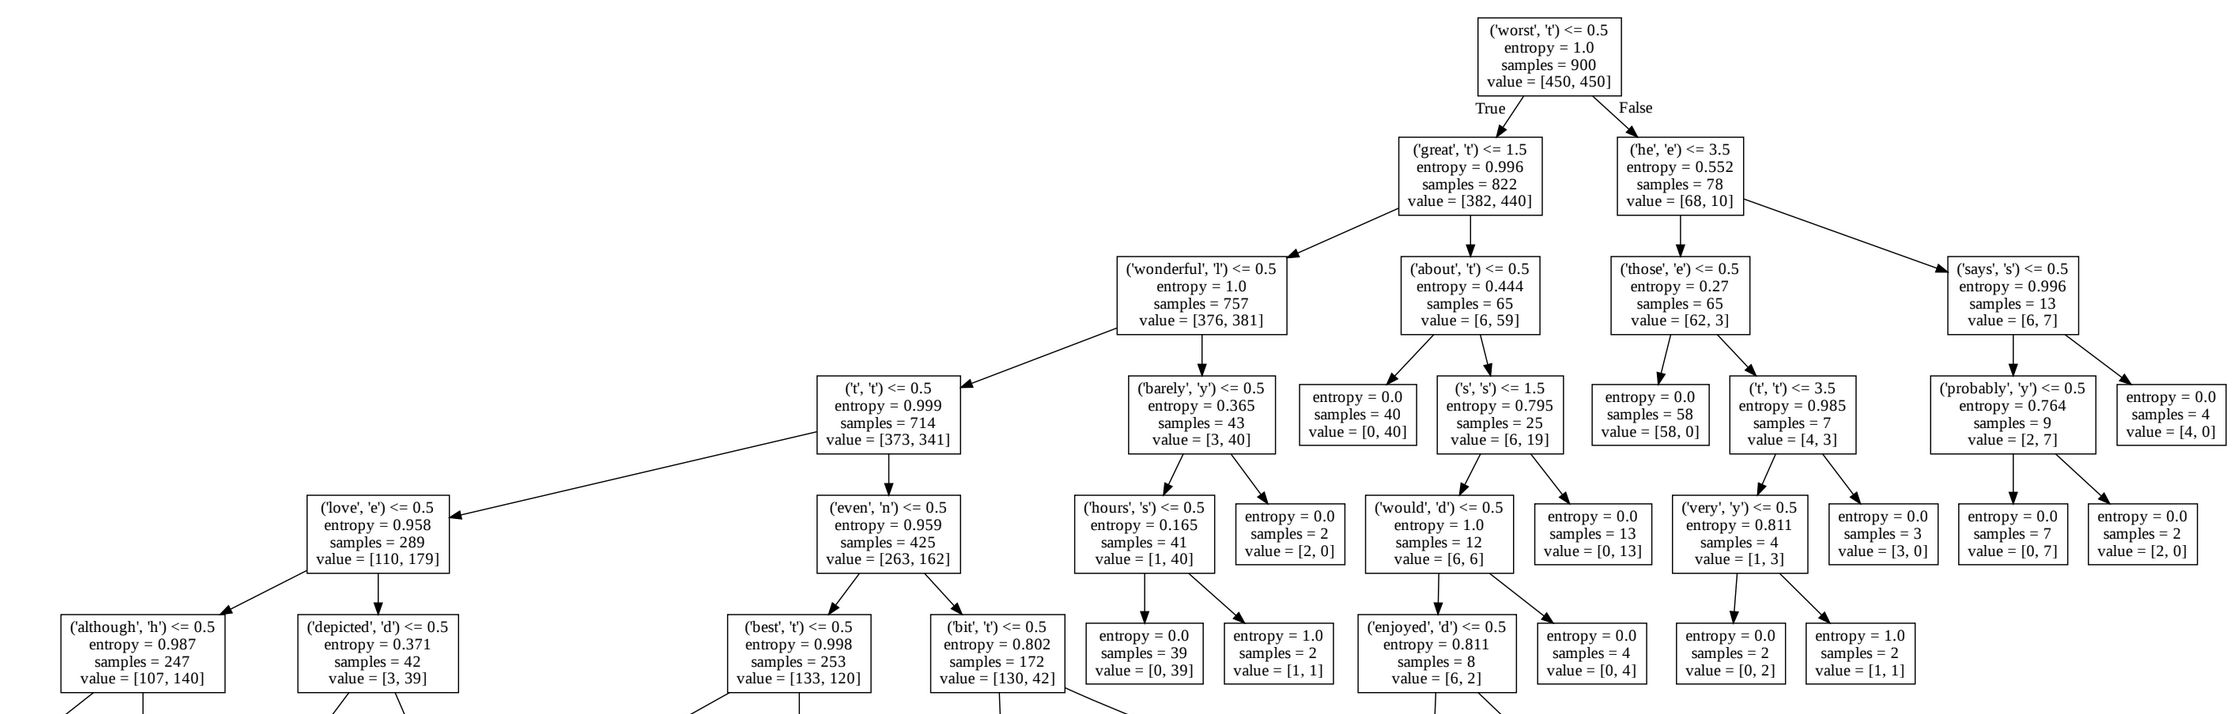

The root node of the tree above tests whether a reivew contains the word 'worst'.  If it does, the word frequency entry for the word is at least 1, hence it is not <= 0.5; therefore, the tweet will follow the right (False) link. 

# Exercise 6 (10 points)
Calculate the expected information gain for the two features: (1) worst, (2) great.  Show your formula before you show your answer.

# Answer to Exercise 6:
- (1) Expected Information Gain for the word 'worst':  formula = 1 - (822/900) * 0.996 - (78/900) * 0.552 = 0.04248
- (2) Expected Information Gain for the word 'great': formula = 0.996 - (757/822) * 1 - (65/822) * 0.444 = 0.03996

# Exercise 7 (20 points)

Complete the following code by
- (1) filling the value of Best_max_depth based on the result of your Miniproject Deliverable #1
- (2) choosing the number k for k-fold Stratified Cross Validation
- (3) completing the file names to be used to store decision trees generated in each fold (which will be saved in the Tree subfolder in your Project folder).
- (4) completing the file name to be used to store a table of feature importance generated at the end of the k-fold (which will be saved in the Project folder).

Execude the code cell. 



In [ ]:
k = 10
skf = StratifiedKFold(n_splits=k, random_state=1, shuffle= True)

Best_max_depth = 7
low_max_depth = Best_max_depth
high_max_depth = Best_max_depth 
training_performance_table= np.empty( [high_max_depth +1, k+1, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k+1, 5] )

for depth in range(low_max_depth, high_max_depth+1):
    
    ### Create a CountVectorizer to map word features of all words in labelled reviews to index of a word frequency matrix.
    count_vect = CountVectorizer(token_pattern = '((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
    x_all = list(data['review'])
    ### The fit method only creates the column index for the Word Frequency matrix for all words in the review.
    ### Because we did not use fit_transform, no word frequency is filled in yet.
    empty_WF_matrix = count_vect.fit(x_all)
    
    ### Prepare the feature_importance_array to store all feature importance measures for all k folds
    feature_names = count_vect.get_feature_names()
    feature_names_array = np.asarray(feature_names)
    WF_dimension = len(feature_names)
    feature_importance_array = np.empty([k+1, WF_dimension])
    #Extract only words (not its first character) from feature_names into a list of words only
    words_only_list = list() 
    for i in range(0, WF_dimension):
      words_only_list.append(feature_names_array[i,0])
    print("Words_only_list:")
    print(words_only_list)
    
    # Initialize the fold to 1.  The value of fold will increase by 1 in each iteration of the loop below.
    fold = 1
    print("***** Maximum Depth of Decision Tree is ", depth, "******")
    for train_index, test_index in skf.split(data_X, data_Y):
        print("Fold Number:", fold)
        #   print("Training Data Index:", train_index)
        #   print("Testing Data Index:", test_index)  
        x_train= list(data.take(train_index)['review'])     
        #    print("Training Data:", x_train)
        y_train= list(data.take(train_index)['classification'])
        #    print("Training Data Target Output:", y_train)
        x_test= list(data.take(test_index)['review'])
        #    print("Testing Data:", x_test)
        y_test= list(data.take(test_index)['classification'])
        #   print("Testing Data Target Output:", y_test)
    
        #   We use transform here, rather than fit_transform, because the word frequency columns have been identified 
        #   earlier using fit
        X_train_word_vect = count_vect.transform(x_train)
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth, \
                                  min_samples_leaf =2)
        clf.fit(X_train_word_vect, y_train)
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(X_train_word_vect)
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)
        
        ### Use the model generated to predict for testing data
        X_test_word_vect = count_vect.transform(x_test)
        predicted_testing_y = clf.predict(X_test_word_vect)
        
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
        #   print("Prediction Performance for Testing Data f1:", test_f1)  
    
        ### Obtain feature importance of the model for all words using .feature_importances_   
        feature_imp = clf.feature_importances_
        ### We store feature importance of kth fold in fold-i row of feature_importance_array
        ### because the first row of the array has index 0.
        feature_importance_array[fold-1] = feature_imp
        #   print("Feature_importance_array:")
        #   print(feature_importance_array)
        
        ### Combine feature importance of this model and feature names to find top 20 important features
        feature_imp_names = zip(feature_imp, words_only_list)
        top_20_features = sorted(feature_imp_names, reverse=True)[:21]
        print("Top 20 important features for fold ", fold)
        for importance, name in top_20_features:
            print(name, importance)
            
        ### Store a visualization of the decision tree model
        dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())
        graph = graphviz.Source(dot_data)
        #### Create a string (to be used as the name of the file for storing the deicion tree visualization)
        #### We include fold number in the file name so that we can compare trees with the feature importance of different folds.
        graph_file_path = "/content/drive/My Drive/DS200Labs/Project/Tree/DT_" + str(depth) + "_Fold_" + str(fold)
        graph.render(graph_file_path)
        
        fold=fold+1 
        ### End of for loop for k-fold Stratified Cross Validation

    ### Convert Feature Importance Array for all k folds to a Panda DataFrame
    ### with column headings being features (words_only)
    feature_importance_k_fold_DF = pd.DataFrame(data=feature_importance_array, columns=words_only_list)
    
    ### Calculate the mean of feature importance for all words across all k folds
    feature_imp_k_fold_avg = np.mean(feature_importance_array, axis=0)
    ### Add the average as the last row (row index k) to the feature_importance_k_fold_DF
    ### For example, for a 10 fold feature importance array, row 0 to row 9 stores feature
    ### importance measure for fold 1 to fold 10.  Hence, the average feature importance can 
    ### be stored in row 10.
    feature_importance_k_fold_DF.loc[k] = feature_imp_k_fold_avg
    
    ### Sort the feature_importance_k_fold_DF by row k (i.e., average of feature importance) in DESCENDING order.
    sorted_feature_importance_k_fold_DF=feature_importance_k_fold_DF.sort_values(by= k, axis='columns', ascending=False)
    print("Feature_importance_k_fold_DF sorted")
    print(sorted_feature_importance_k_fold_DF)
    ### Save the sorted feature importance DF as a CSV file 
    filename2 = "/content/drive/My Drive/DS200Labs/Project/FeatureImp_" + str(depth) + "_for_" + str(k) + "_Fold" + ".csv"
    sorted_feature_importance_k_fold_DF.to_csv(filename2)       
    
    ### Print top 40 features with highest average feature importance across all folds
    feature_imp_avg_words = zip(feature_imp_k_fold_avg, words_only_list)
    top_40_K_fold_features = sorted(feature_imp_avg_words, reverse=True)[:41]
    print("Top 40 important features across all k folds")
    for importance, word in top_40_K_fold_features:
            print(word, importance)

# End of for loop for max_depth

Words_only_list:
['#1', '#2', '0', '00', '000', '01', '02', '07', '09', '1', '10', '100', '1000', '101', '108', '10th', '11', '12', '12th', '13', '13th', '14', '14th', '15', '150', '16', '16mm', '16th', '17', '1794', '18', '180', '1800s', '1890s', '18th', '19', '1913', '1920', '1920s', '1921', '1927', '1928', '1930', '1930s', '1932', '1933', '1934', '1936', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1950s', '1951', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1960s', '1961', '1962', '1963', '1965', '1966', '1967', '1968', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '2', '20', '200', '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 

# Exercise 8 (20 points)

Open the CSV file in your Project folder that show feature importance sorted by their average importance across k folds (which is the last row of the csv file).
- (1) Among top 40 features, select those that you believe are "meaningful" for sentiment classification. 
- (2) Amnong top 40 features, select those that you believe are not meaningful for sentiment classification (e.g.,  Words
that occur frequent in English sentences such as the "be" verb, pronoun such as "it", "I", "he", "she").
- (3) Among the top 40 features, how many of them have non-zero importance in all k folds?
- (4) Amnong the top 40 features, how many of them have non-zero importance in at least k/2 folds?


# Answer to Exercise 8
- (1) bad, worst, waste, great, stupid, best, wonderful, disappointing, beautiful, vicious, awful, worse, amazing, perfectly
- (2) nothing, t, performance, the, always, want, just, action, crime, decide, plot, actually, new, re, mr, with, father, even, especially, done, top, have, doesn, make, when, will
- (3) bad, worst, waste, great, so it's 4 in total have non-zero importance in all k folds.
- (4) bad, worst, waste, great, nothing, t, performance, stupid, best, the, always, want, just, action, crime, decide, total of 16 have at least 5 folds non-zero importance.

# Exercise 9 (20 points)
- Select one of the decision tree generated (and saved in your Tree subdirectory).
- (a) Identify those important features you considered "meaningful" in Exercise 8-1 that also occur in this tree.
- (b) Pick one meaningful important feature for negative reviews (which we will refer to as negative word), and one meaningful important feature for positive reviews (which we will refer to as positive word) that occur on your decision tree.
- (c) Discuss, based on the tree, whether the occurance of the positive word indicates the likelihood of positive sentiment increases.
- (d) Discuss, based on the tree, whether the occurance of the negative word indicates the likelihood of negative sentiment increases.


# Answer to Exercise 9
- Fold 1
- (a) bad, worst, waste, stupid, great, best, amazing, awful
- (b) negative: awful; positive: amazing
- (c) True branch, does not occur: p(+)=336/612=0.549;
False branch, does occur: p(+)=28/30=0.933. Thus, the occurance of amazing does indicate the likelihood of positive sentiment increases
- (d) True branch, does not occur: p(-)=23/32=0.719;
False branch, does occur: p(-)=0/4=0. The occurance of awful does not indicate the likelihood of negative sentiment increases.

# Submission of MiniProject Deliverable #2

After you complete all of the exercises, submit the following three items:
- An HTML version of this Jupyter Notebook. Name the file as "Project2" followed by your First Name and Last Name.
- The csv file of Sored Feature Importance you generated.
- The decision tree (PDF file) you used in your answer to Exercise 9.